In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam, optics, beamline2d

Can't find epics package. PPM_Imager class will not be supported


In [124]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 8800.

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 10,
    'scaleFactor': 3,
    'z_source': 630
}

(1500, 2)


<IPython.core.display.Javascript object>


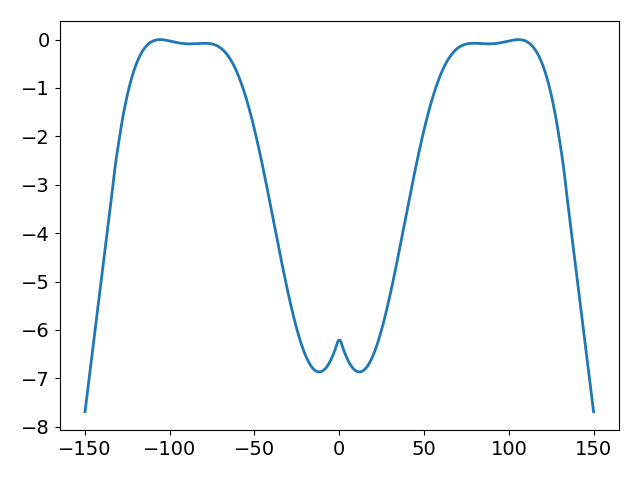

<IPython.core.display.Javascript object>


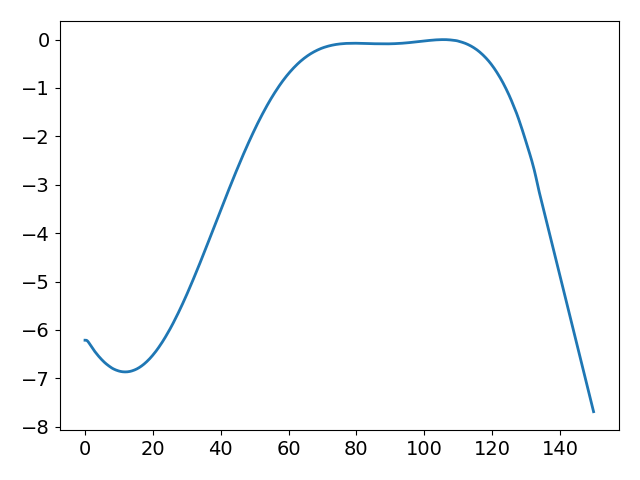

<IPython.core.display.Javascript object>


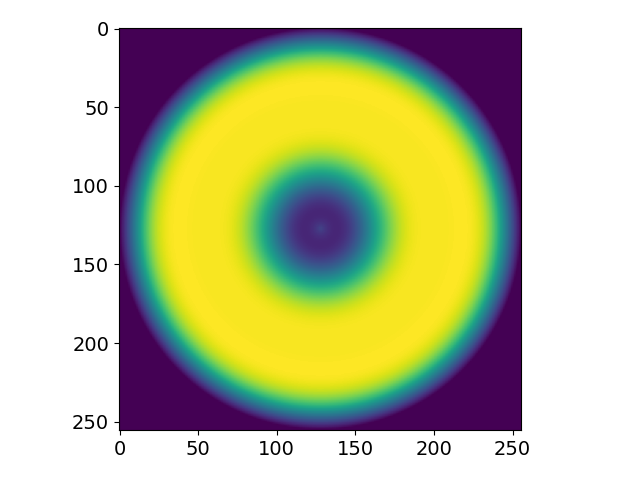

3.7766919687119357e-06


<IPython.core.display.Javascript object>


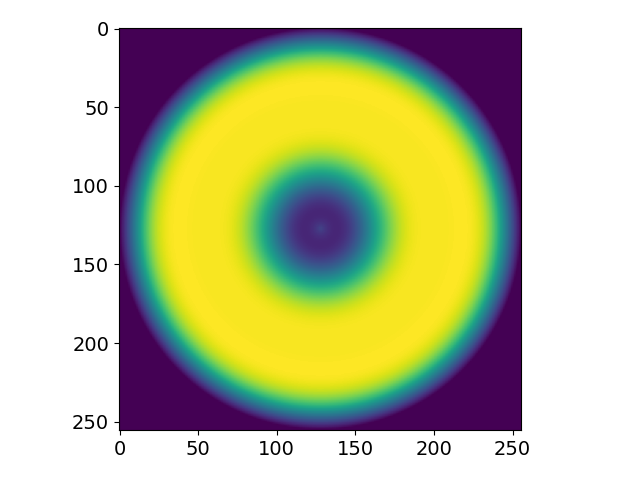

<IPython.core.display.Javascript object>


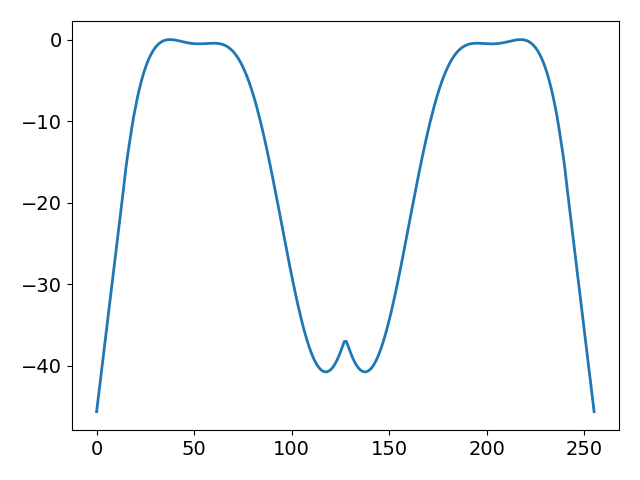

In [125]:
data = np.loadtxt('20_Be-CRL_9.5keV_LCLS_phase_smooth.txt')
print(data.shape)
plate = np.zeros(3000)
x = np.zeros(3000)
plate[0:1500] = data[::-1,1]
plate[1500:] = data[:,1]
x[0:1500] = data[::-1,0]*-1
x[1500:] = data[:,0]

plt.figure()
plt.plot(x,plate)

plt.figure()
plt.plot(data[:,0],data[:,1])

N = 256
x2 = np.linspace(-1,1,N)

x,y = np.meshgrid(x2,x2)
r = np.sqrt(x**2+y**2)

test = np.reshape(np.interp(r.flatten(),data[:,0]/np.max(data[:,0]),data[:,1]),x.shape)
plt.figure()
plt.imshow(test)

phasePerLens = test/20

test_lens = optics.CRL('test')
delta = np.interp(9500, test_lens.energy, test_lens.delta)
print(delta)

lambda0 = 1239.8/E0*1e-9

lens_shape = lambda0*phasePerLens/2/np.pi/delta

plt.figure()
plt.imshow(lens_shape*1e6)

plt.figure()
plt.plot(lens_shape[128,:]*1e6*20)

In [157]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# Stack of 20 CRLs for tight focus
crl_list = []
for i in range(40):
    dx = (2*np.random.rand()-1)*5*1e-6
    dy = (2*np.random.rand()-1)*5*1e-6
    crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=dx, dy=dy, shapeError=lens_shape))

IP = optics.PPM('IP', FOV=2e-6, z=crl_list[-1].z+129e-3)
ds_IP = optics.PPM('ds_IP', FOV=10e-6, z=IP.z+5e-3, calc_phase=True)

upstream_YAG = optics.PPM('YAG1',FOV=2e-3,z=800 + 42e-3)
downstream_YAG = optics.PPM('YAG', FOV=30e-3, z=805)


devices = [mr1l0,mr2l0, IP,ds_IP,downstream_YAG, upstream_YAG]
devices = devices + crl_list

XPP = beamline2d.Beamline(devices)

FWHM in x: 388.4667023075743 microns
FWHM in y: 388.4667023075743 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
x is focused
y is focused


FWHM in x: 388.4667023075743 microns
FWHM in y: 388.4667023075743 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
x is focused
y is focused
mr1l0
drift1
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
current step size: 26845666.34 microns
x becomes unfocused
y becomes unfocused
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 25868333.66 microns
goal for zx: 170000000.00 microns
current zx: 144131666.34 microns
goal for zy: 170000000.00 microns
current zy: 144131666.34 microns
crl0
focal length: 5.68
drift3
zRx: 1224350.81 microns
zRy

crl31
focal length: 5.68
drift34
zRx: 1188.99 microns
zRy: 1188.99 microns
remaining distance: 1000.00 microns
goal for zx: -166384.42 microns
current zx: -167384.42 microns
goal for zy: -166384.42 microns
current zy: -167384.42 microns
crl32
focal length: 5.68
drift35
zRx: 1122.28 microns
zRy: 1122.28 microns
remaining distance: 1000.00 microns
goal for zx: -160648.96 microns
current zx: -161648.96 microns
goal for zy: -160648.96 microns
current zy: -161648.96 microns
crl33
focal length: 5.68
drift36
zRx: 1061.38 microns
zRy: 1061.38 microns
remaining distance: 1000.00 microns
goal for zx: -155230.00 microns
current zx: -156230.00 microns
goal for zy: -155230.00 microns
current zy: -156230.00 microns
crl34
focal length: 5.68
drift37
zRx: 1005.66 microns
zRy: 1005.66 microns
remaining distance: 1000.00 microns
goal for zx: -150100.30 microns
current zx: -151100.30 microns
goal for zy: -150100.30 microns
current zy: -151100.30 microns
crl35
focal length: 5.68
drift38
zRx: 954.54 microns

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


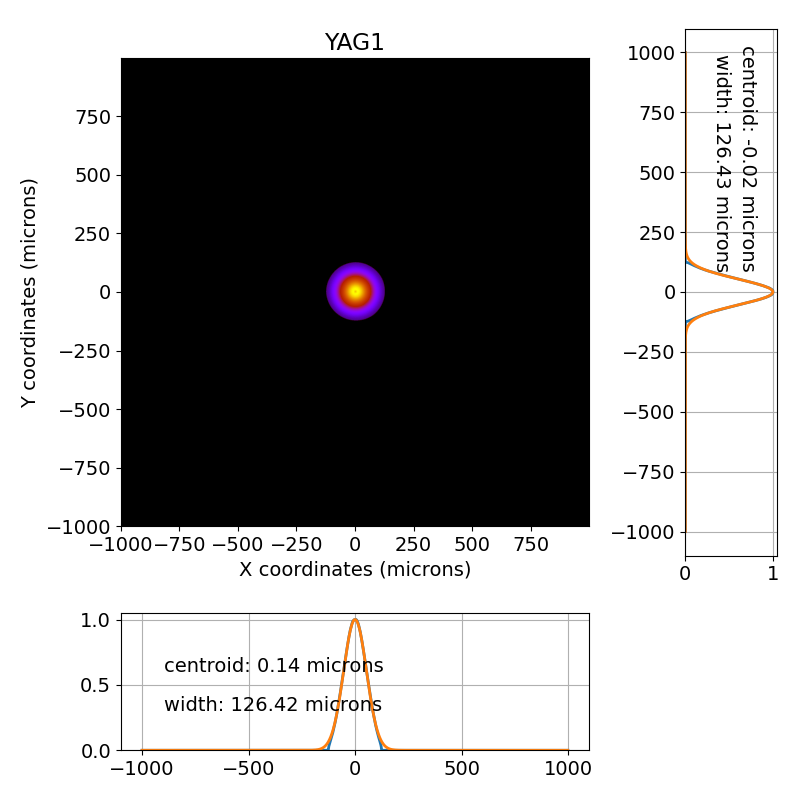

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


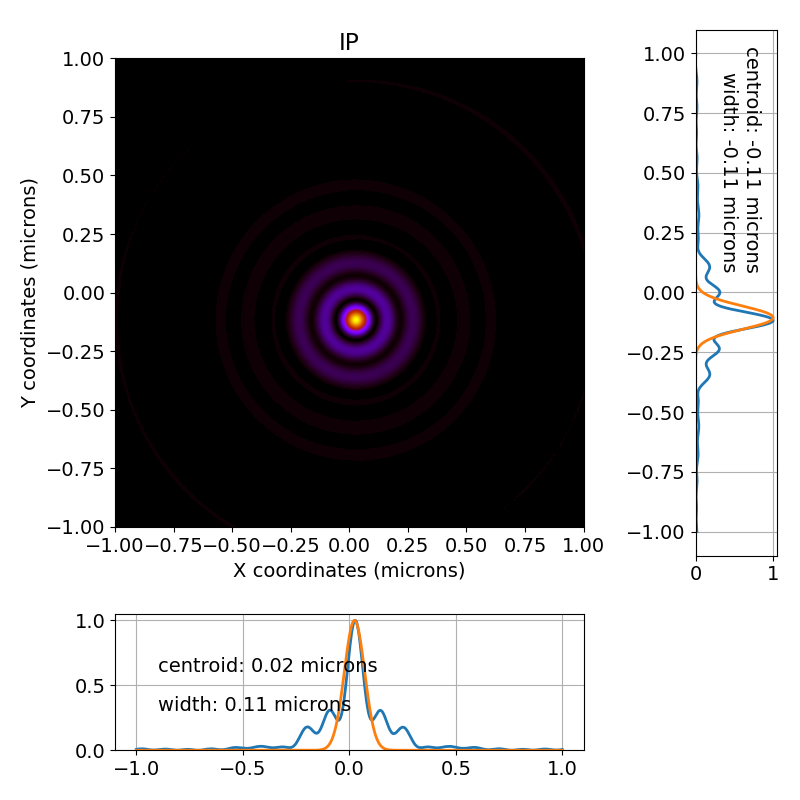

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


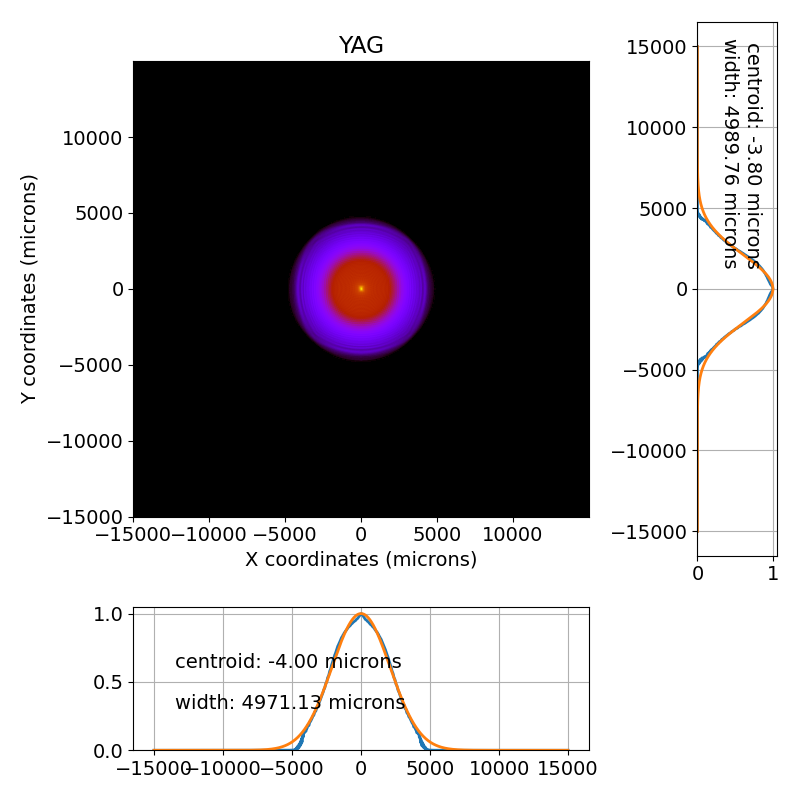

In [158]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
XPP.YAG.view_beam()

In [47]:
print(b1.scaleFactor)

8


<IPython.core.display.Javascript object>


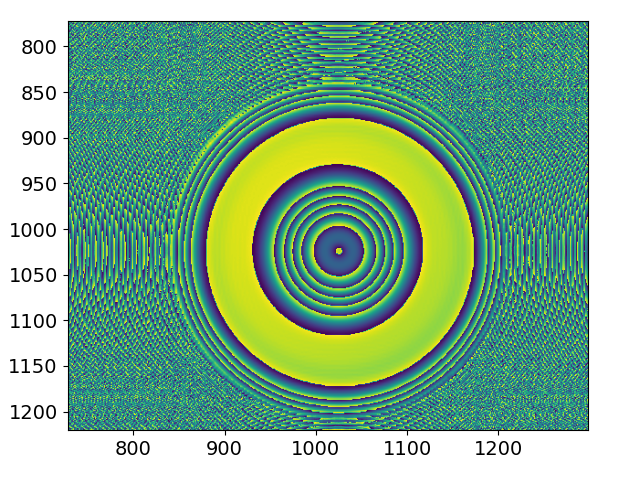

In [66]:
plt.figure()
plt.imshow(np.angle(b2.wave))

<IPython.core.display.Javascript object>


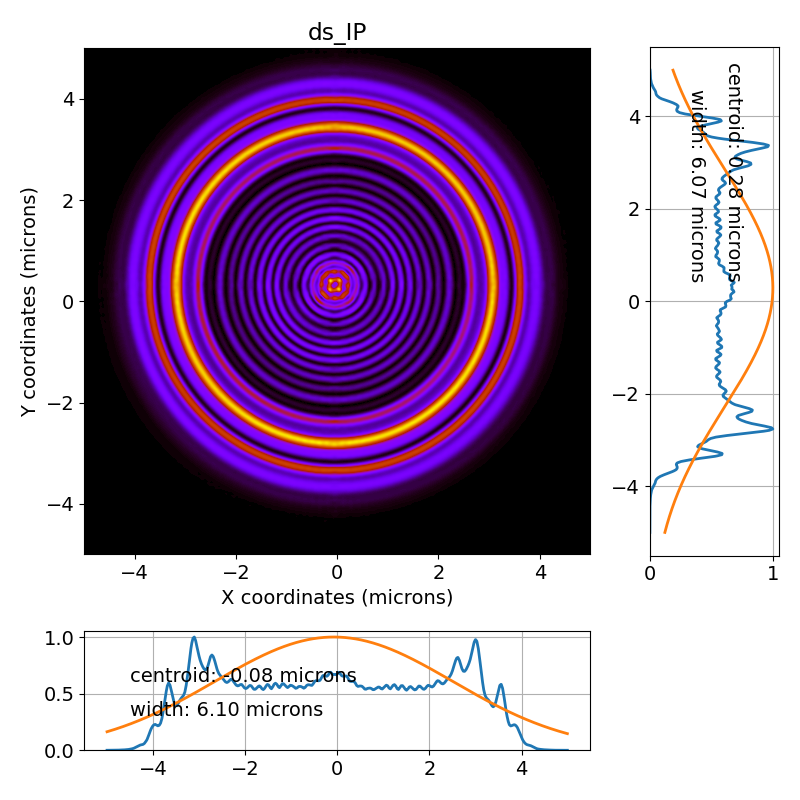

In [130]:
ds_IP.view_beam()

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


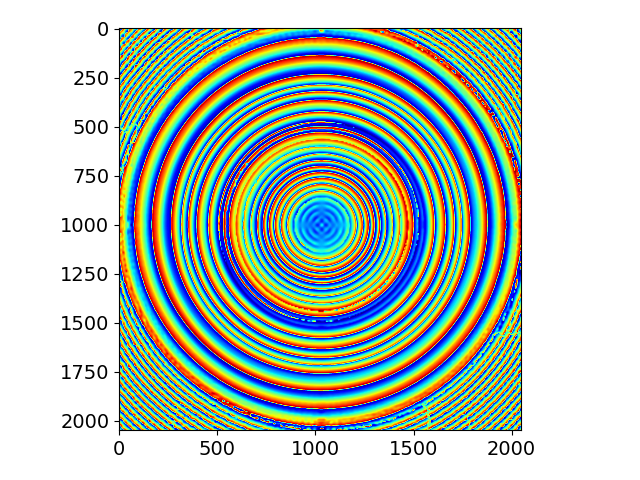

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


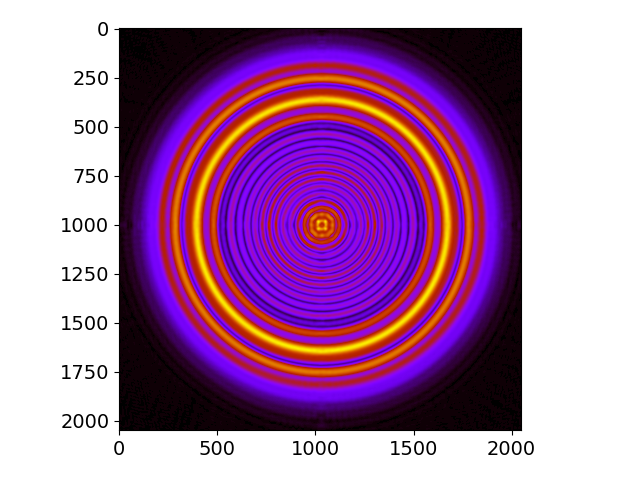

In [160]:
test, zx,zy,cx,cy = ds_IP.complex_beam()
quadPhase = np.exp(1j*np.pi/lambda0*((ds_IP.xx-cx)**2/zx+(ds_IP.yy-cy)**2/zy))
plt.figure()
plt.imshow(np.angle(test*quadPhase),cmap=plt.get_cmap('jet'))
plt.figure()
plt.imshow(np.abs(test),cmap=plt.get_cmap('gnuplot'))

In [161]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# Stack of 20 CRLs for tight focus
crl_list = []
for i in range(40):
    dx = (2*np.random.rand()-1)*5*1e-6
    dy = (2*np.random.rand()-1)*5*1e-6
    crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=dx, dy=dy))

IP = optics.PPM('IP', FOV=2e-6, z=crl_list[-1].z+129e-3)
ds_IP = optics.PPM('ds_IP', FOV=10e-6, z=IP.z+5e-3, calc_phase=True)

upstream_YAG = optics.PPM('YAG1',FOV=2e-3,z=800 + 52e-3)
downstream_YAG = optics.PPM('YAG', FOV=30e-3, z=805)


devices = [mr1l0,mr2l0, IP,ds_IP,downstream_YAG, upstream_YAG]
devices = devices + crl_list

XPP = beamline2d.Beamline(devices)

FWHM in x: 388.4667023075743 microns
FWHM in y: 388.4667023075743 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
x is focused
y is focused


FWHM in x: 388.4667023075743 microns
FWHM in y: 388.4667023075743 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
x is focused
y is focused
mr1l0
drift1
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
current step size: 26845666.34 microns
x becomes unfocused
y becomes unfocused
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 25868333.66 microns
goal for zx: 170000000.00 microns
current zx: 144131666.34 microns
goal for zy: 170000000.00 microns
current zy: 144131666.34 microns
crl0
focal length: 5.68
drift3
zRx: 1224350.81 microns
zRy

crl31
focal length: 5.68
drift34
zRx: 1188.99 microns
zRy: 1188.99 microns
remaining distance: 1000.00 microns
goal for zx: -166384.42 microns
current zx: -167384.42 microns
goal for zy: -166384.42 microns
current zy: -167384.42 microns
crl32
focal length: 5.68
drift35
zRx: 1122.28 microns
zRy: 1122.28 microns
remaining distance: 1000.00 microns
goal for zx: -160648.96 microns
current zx: -161648.96 microns
goal for zy: -160648.96 microns
current zy: -161648.96 microns
crl33
focal length: 5.68
drift36
zRx: 1061.38 microns
zRy: 1061.38 microns
remaining distance: 1000.00 microns
goal for zx: -155230.00 microns
current zx: -156230.00 microns
goal for zy: -155230.00 microns
current zy: -156230.00 microns
crl34
focal length: 5.68
drift37
zRx: 1005.66 microns
zRy: 1005.66 microns
remaining distance: 1000.00 microns
goal for zx: -150100.30 microns
current zx: -151100.30 microns
goal for zy: -150100.30 microns
current zy: -151100.30 microns
crl35
focal length: 5.68
drift38
zRx: 954.54 microns

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


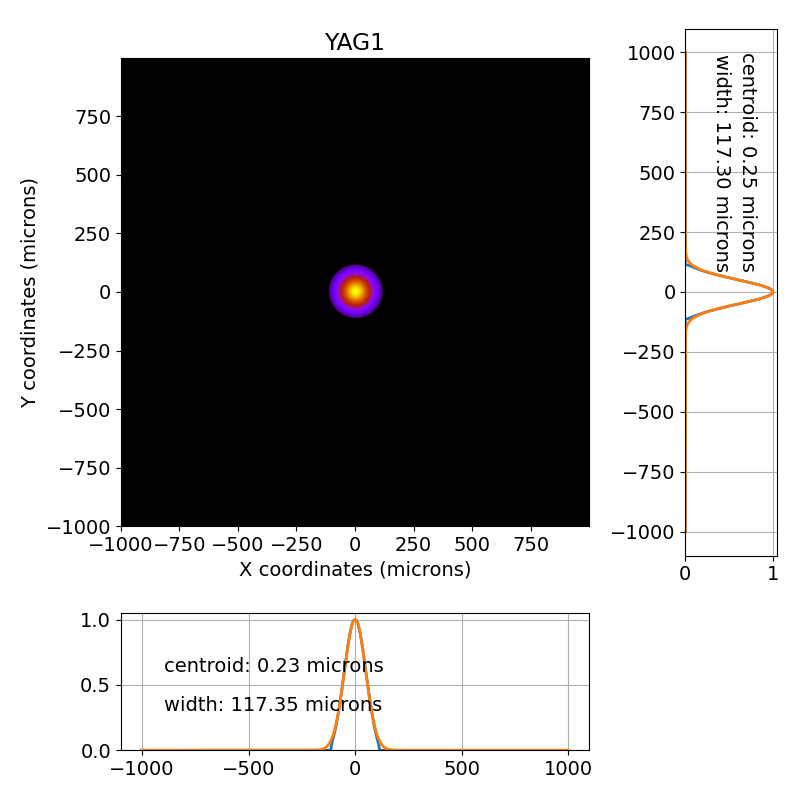

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


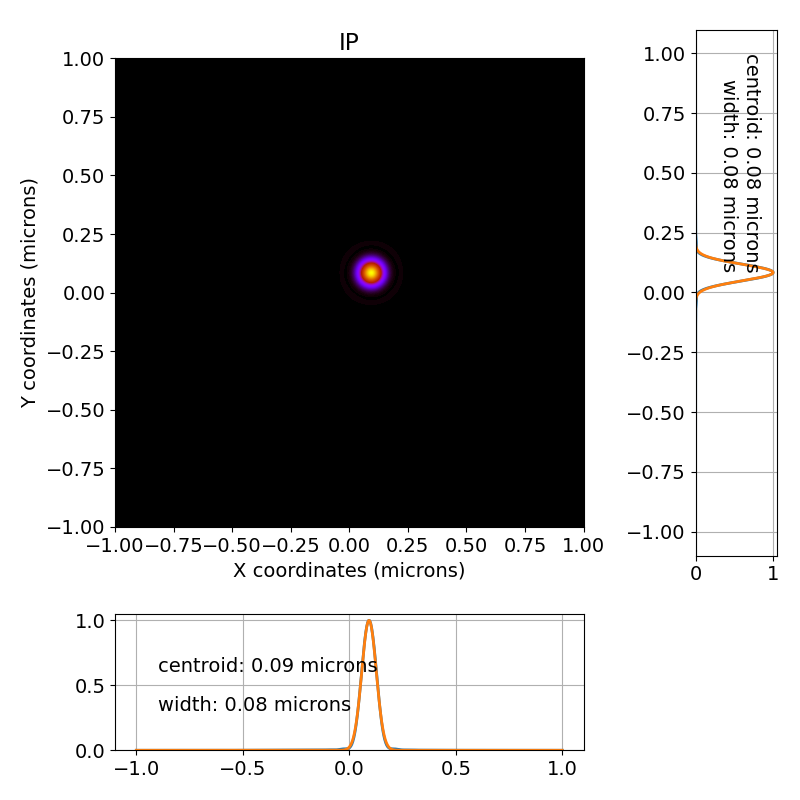

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


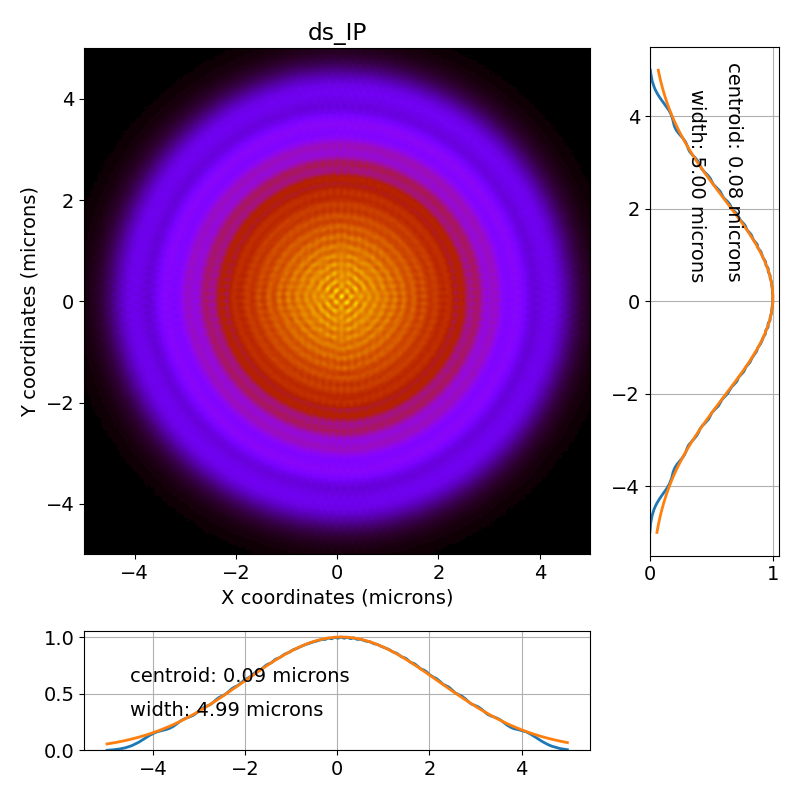

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


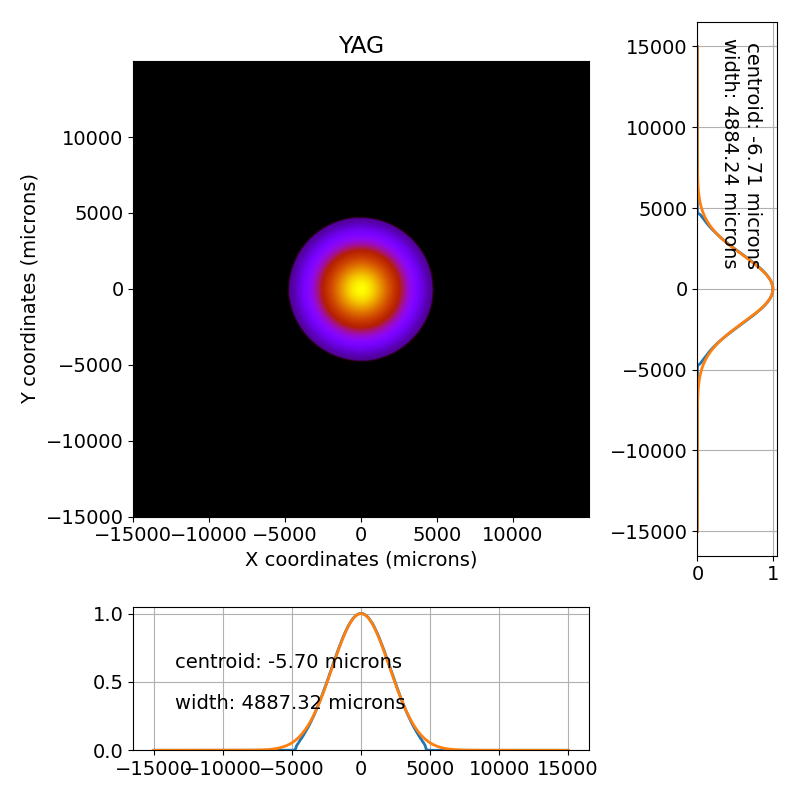

In [162]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
XPP.ds_IP.view_beam()
XPP.YAG.view_beam()

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


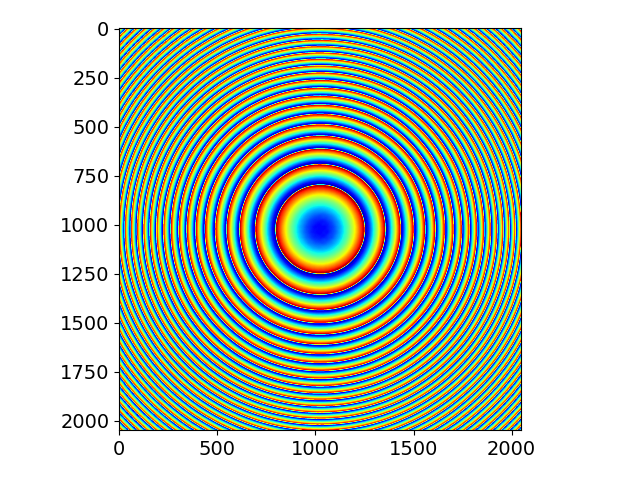

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


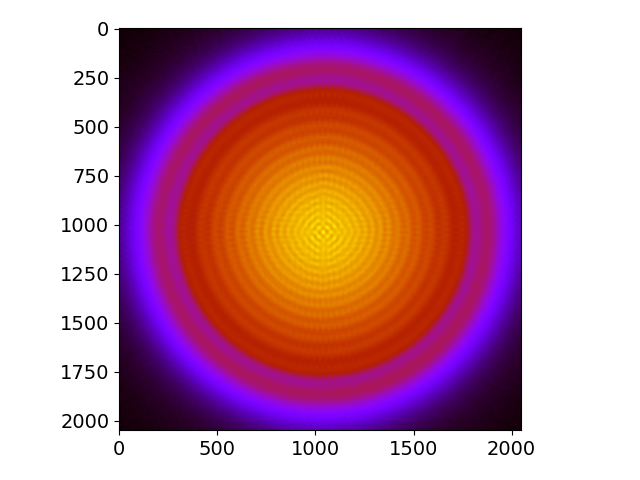

In [163]:
test, zx,zy,cx,cy = ds_IP.complex_beam()
quadPhase = np.exp(1j*np.pi/lambda0*(ds_IP.xx**2/zx+ds_IP.yy**2/zy))
plt.figure()
plt.imshow(np.angle(test*quadPhase),cmap=plt.get_cmap('jet'))
plt.figure()
plt.imshow(np.abs(test),cmap=plt.get_cmap('gnuplot'))

In [167]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# Stack of 20 CRLs for tight focus
crl_list = []
for i in range(40):
    dx = (2*np.random.rand()-1)*5*1e-6
    dy = (2*np.random.rand()-1)*5*1e-6
    crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=dx*0, dy=dy*0, shapeError=lens_shape))
    
phase_plate = optics.CRL('phase_plate', z=crl_list[-1].z+5e-3, roc=1e6, diameter=254e-6, shapeError=-lens_shape*40)

IP = optics.PPM('IP', FOV=2e-6, z=crl_list[-1].z+129e-3)
ds_IP = optics.PPM('ds_IP', FOV=10e-6, z=IP.z+5e-3, calc_phase=True)

upstream_YAG = optics.PPM('YAG1',FOV=2e-3,z=800 + 42e-3, calc_phase=True)
downstream_YAG = optics.PPM('YAG', FOV=30e-3, z=805)


devices = [mr1l0,mr2l0, phase_plate, IP,ds_IP,downstream_YAG, upstream_YAG]
devices = devices + crl_list

XPP = beamline2d.Beamline(devices)

FWHM in x: 388.4667023075743 microns
FWHM in y: 388.4667023075743 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
x is focused
y is focused


FWHM in x: 388.4667023075743 microns
FWHM in y: 388.4667023075743 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
x is focused
y is focused
mr1l0
drift1
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
current step size: 26845666.34 microns
x becomes unfocused
y becomes unfocused
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 25868333.66 microns
goal for zx: 170000000.00 microns
current zx: 144131666.34 microns
goal for zy: 170000000.00 microns
current zy: 144131666.34 microns
crl0
focal length: 5.68
drift3
zRx: 1224350.81 microns
zRy

crl31
focal length: 5.68
drift34
zRx: 1188.99 microns
zRy: 1188.99 microns
remaining distance: 1000.00 microns
goal for zx: -166384.42 microns
current zx: -167384.42 microns
goal for zy: -166384.42 microns
current zy: -167384.42 microns
crl32
focal length: 5.68
drift35
zRx: 1122.28 microns
zRy: 1122.28 microns
remaining distance: 1000.00 microns
goal for zx: -160648.96 microns
current zx: -161648.96 microns
goal for zy: -160648.96 microns
current zy: -161648.96 microns
crl33
focal length: 5.68
drift36
zRx: 1061.38 microns
zRy: 1061.38 microns
remaining distance: 1000.00 microns
goal for zx: -155230.00 microns
current zx: -156230.00 microns
goal for zy: -155230.00 microns
current zy: -156230.00 microns
crl34
focal length: 5.68
drift37
zRx: 1005.66 microns
zRy: 1005.66 microns
remaining distance: 1000.00 microns
goal for zx: -150100.30 microns
current zx: -151100.30 microns
goal for zy: -150100.30 microns
current zy: -151100.30 microns
crl35
focal length: 5.68
drift38
zRx: 954.54 microns

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


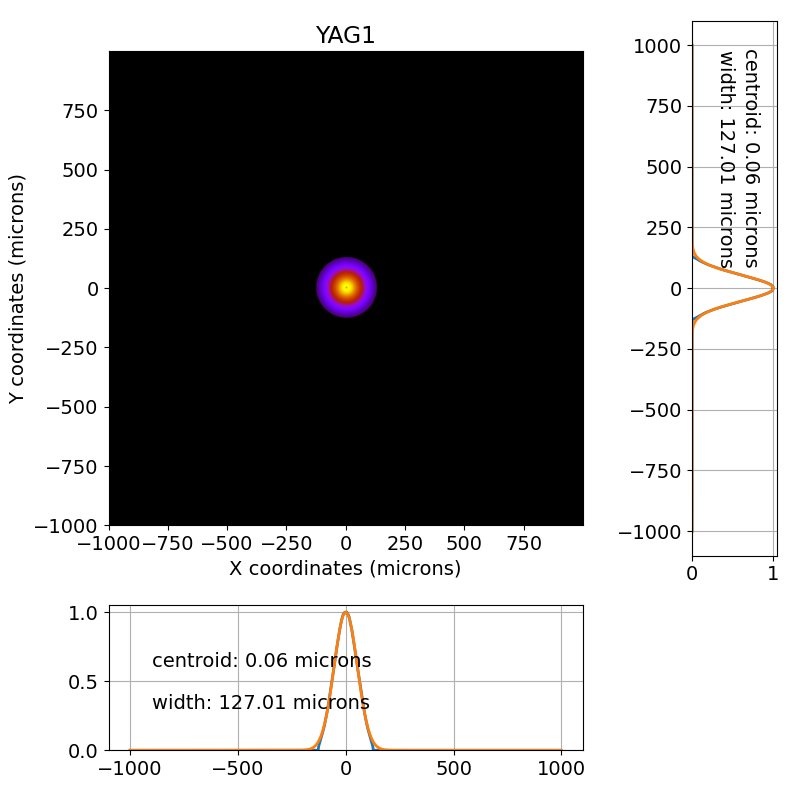

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


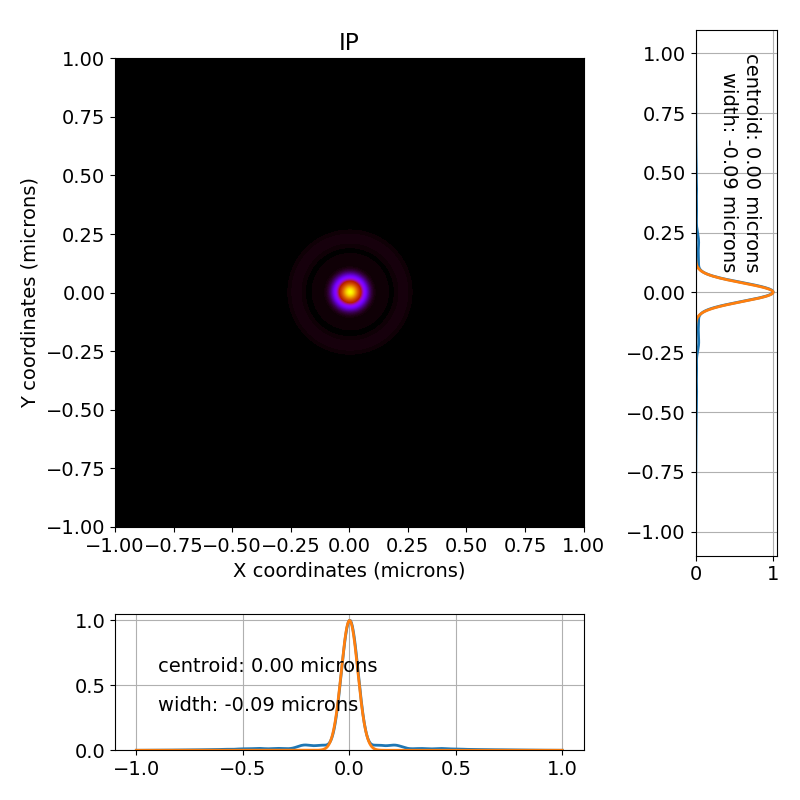

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


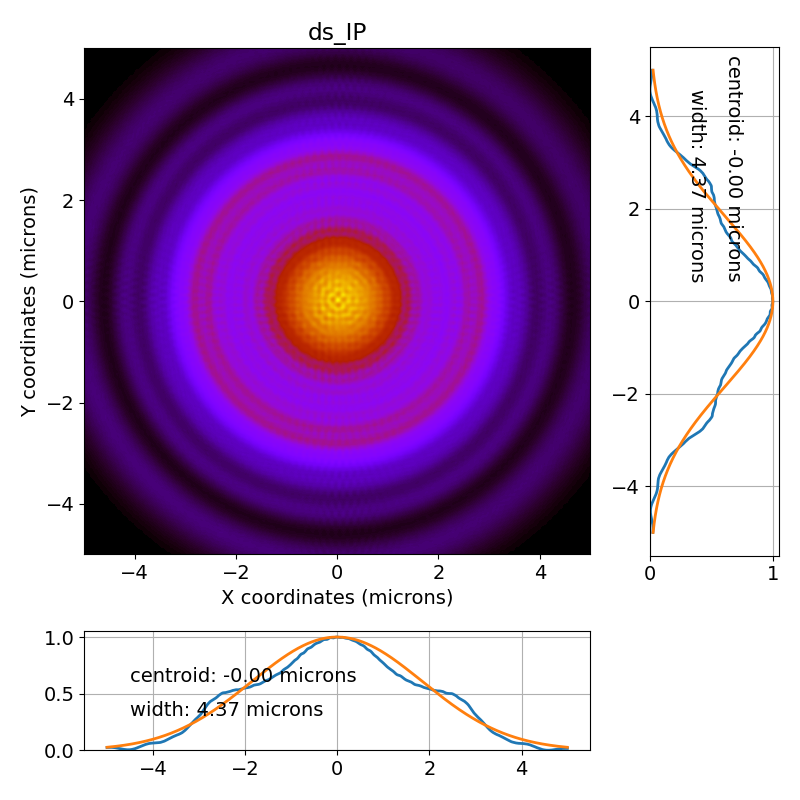

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


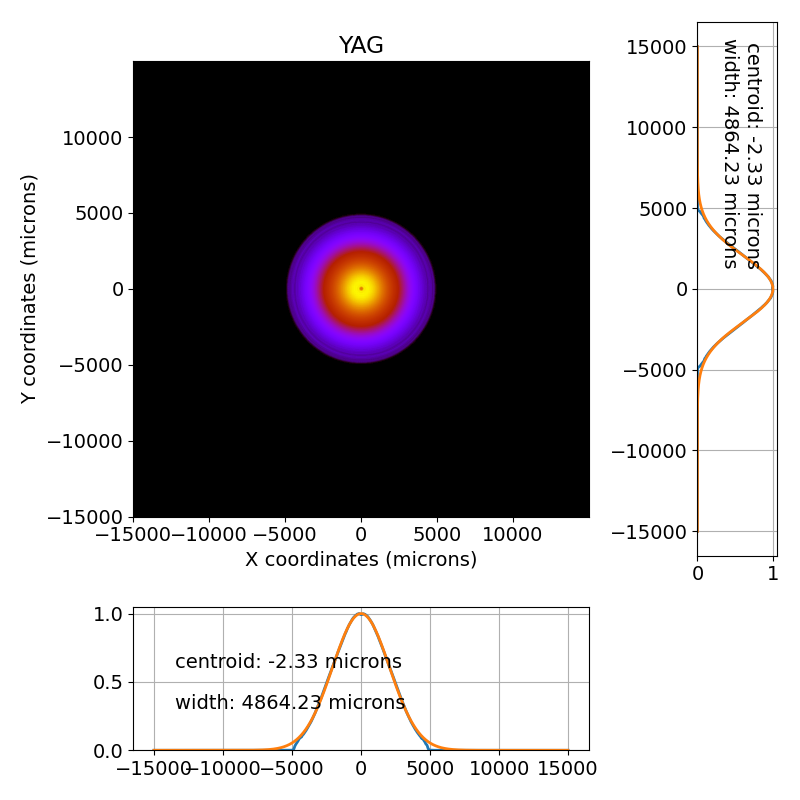

In [168]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
XPP.ds_IP.view_beam()
XPP.YAG.view_beam()

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


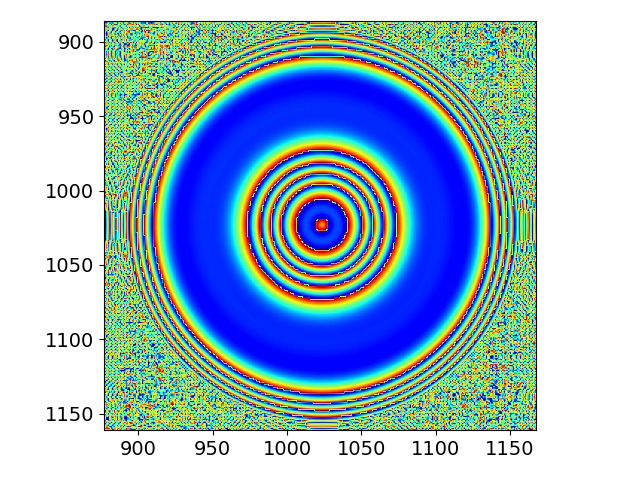

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


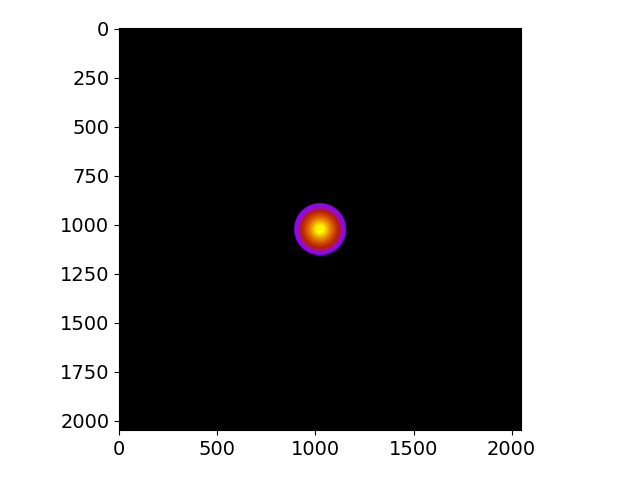

In [169]:
test, zx,zy,cx,cy = XPP.YAG1.complex_beam()
quadPhase = np.exp(1j*np.pi/lambda0*((ds_IP.xx-cx)**2/zx+(ds_IP.yy-cy)**2/zy))
plt.figure()
plt.imshow(np.angle(test),cmap=plt.get_cmap('jet'))
plt.figure()
plt.imshow(np.abs(test),cmap=plt.get_cmap('gnuplot'))

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


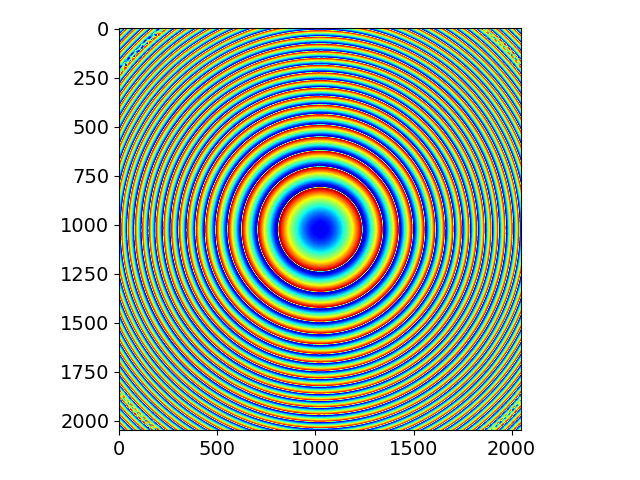

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


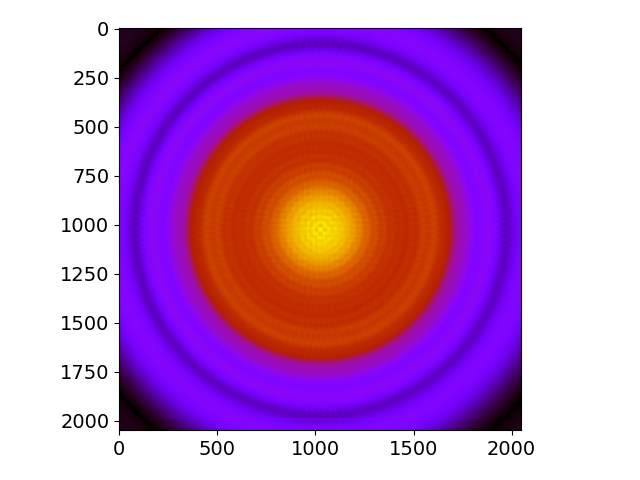

In [170]:
test, zx,zy,cx,cy = ds_IP.complex_beam()
quadPhase = np.exp(1j*np.pi/lambda0*((ds_IP.xx-cx)**2/zx+(ds_IP.yy-cy)**2/zy))
plt.figure()
plt.imshow(np.angle(test*quadPhase),cmap=plt.get_cmap('jet'))
plt.figure()
plt.imshow(np.abs(test),cmap=plt.get_cmap('gnuplot'))

In [154]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# Stack of 20 CRLs for tight focus
crl_list = []
for i in range(20):
    dx = (2*np.random.rand()-1)*5*1e-6
    dy = (2*np.random.rand()-1)*5*1e-6
    crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=dx*0, dy=dy*0, shapeError=lens_shape))
    
phase_plate = optics.CRL('phase_plate', z=crl_list[-1].z+5e-3, roc=1e6, shapeError=-lens_shape*20)

IP = optics.PPM('IP', FOV=5e-6, z=crl_list[-1].z+278.3e-3)
ds_IP = optics.PPM('ds_IP', FOV=10e-6, z=IP.z+5e-3, calc_phase=True)

upstream_YAG = optics.PPM('YAG1',FOV=2e-3,z=800 + 22e-3, calc_phase=True)
downstream_YAG = optics.PPM('YAG', FOV=30e-3, z=805)


devices = [mr1l0,mr2l0, phase_plate, IP,ds_IP,downstream_YAG, upstream_YAG]
devices = devices + crl_list

XPP = beamline2d.Beamline(devices)

FWHM in x: 388.4667023075743 microns
FWHM in y: 388.4667023075743 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
x is focused
y is focused


FWHM in x: 388.4667023075743 microns
FWHM in y: 388.4667023075743 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
x is focused
y is focused
mr1l0
drift1
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 7286000.00 microns
goal for zx: 117286000.00 microns
current zx: 110000000.00 microns
goal for zy: 117286000.00 microns
current zy: 110000000.00 microns
mr2l0
drift2
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 52714000.00 microns
goal for zx: 170000000.00 microns
current zx: 117286000.00 microns
goal for zy: 170000000.00 microns
current zy: 117286000.00 microns
current step size: 26845666.34 microns
x becomes unfocused
y becomes unfocused
zRx: 144131666.34 microns
zRy: 144131666.34 microns
remaining distance: 25868333.66 microns
goal for zx: 170000000.00 microns
current zx: 144131666.34 microns
goal for zy: 170000000.00 microns
current zy: 144131666.34 microns
crl0
focal length: 5.68
drift3
zRx: 1224350.81 microns
zRy

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


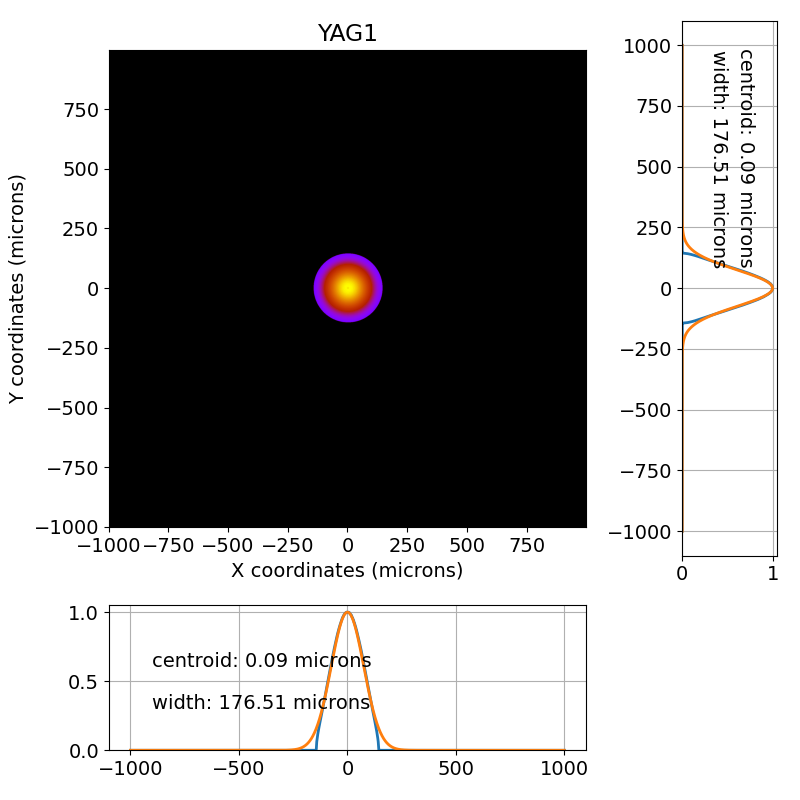

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


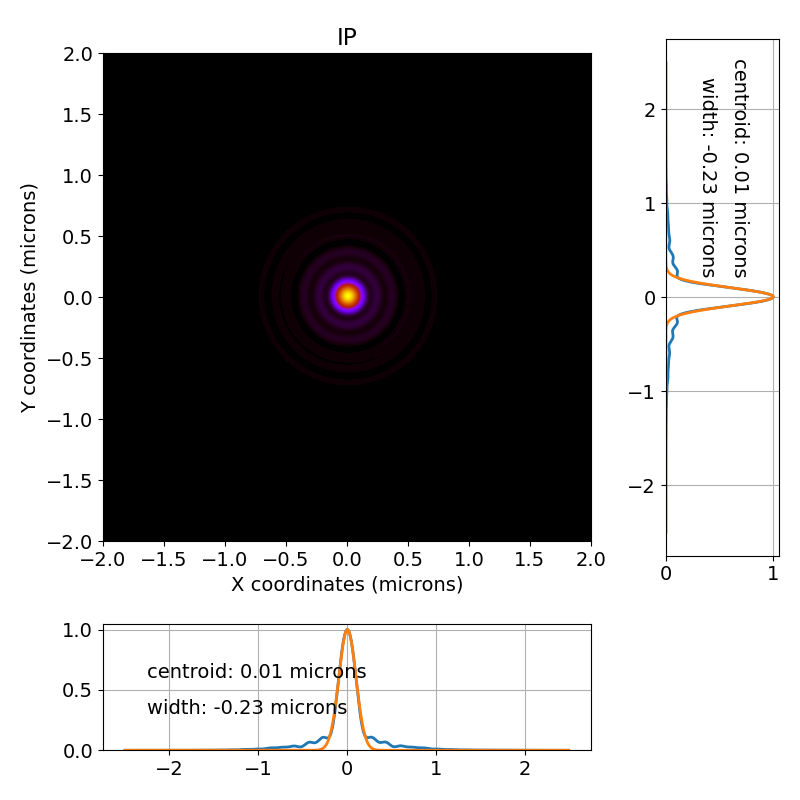

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


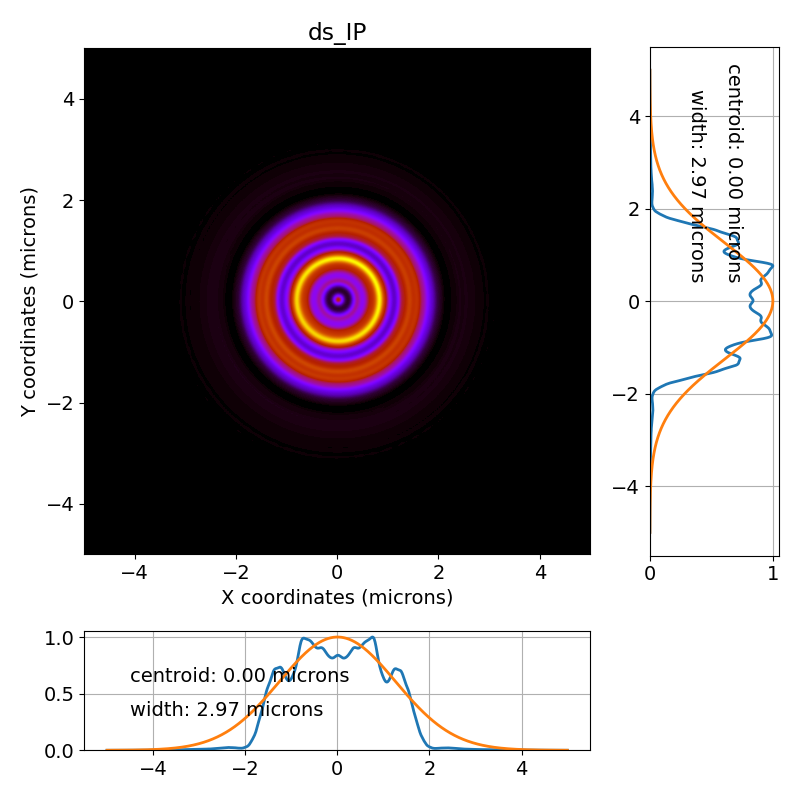

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics.py:2892: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>


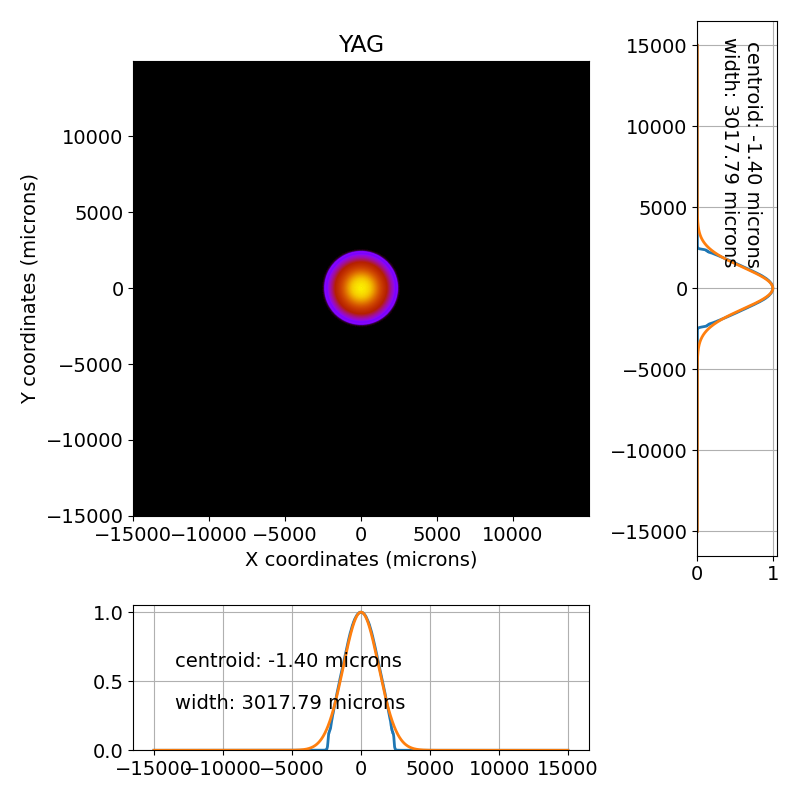

In [155]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
XPP.ds_IP.view_beam()
XPP.YAG.view_beam()

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


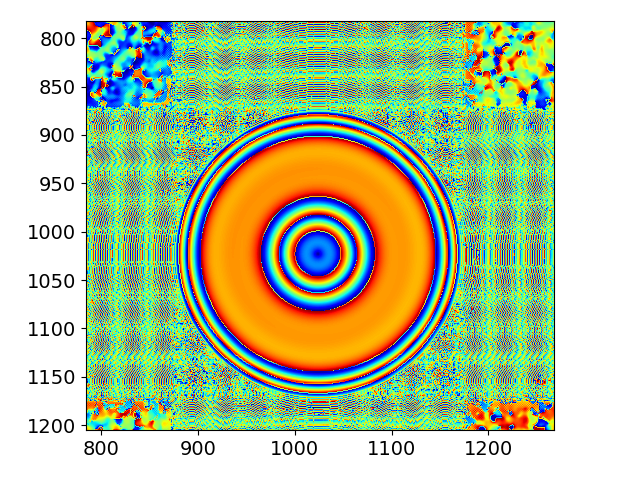

/Users/seaberg/beamline/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


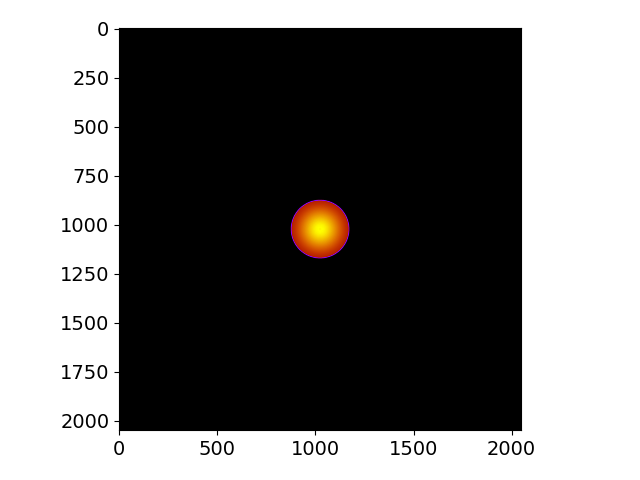

In [156]:
test, zx,zy,cx,cy = XPP.YAG1.complex_beam()
quadPhase = np.exp(1j*np.pi/lambda0*((ds_IP.xx-cx)**2/zx+(ds_IP.yy-cy)**2/zy))
plt.figure()
plt.imshow(np.angle(test),cmap=plt.get_cmap('jet'))
plt.figure()
plt.imshow(np.abs(test),cmap=plt.get_cmap('gnuplot'))

<IPython.core.display.Javascript object>


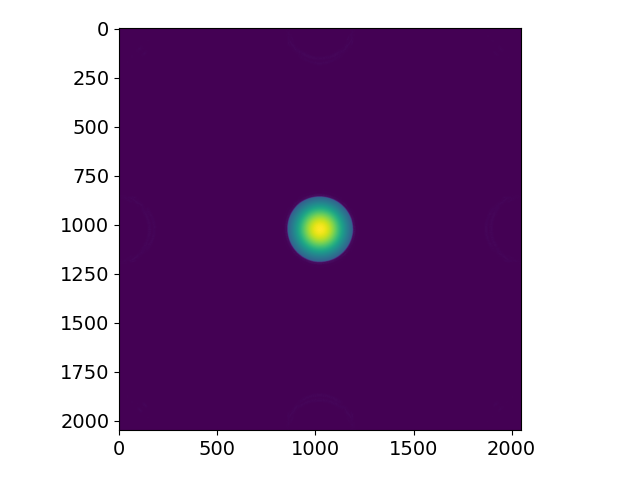

In [137]:
plt.figure()
plt.imshow(np.abs(b2.wave))

<IPython.core.display.Javascript object>


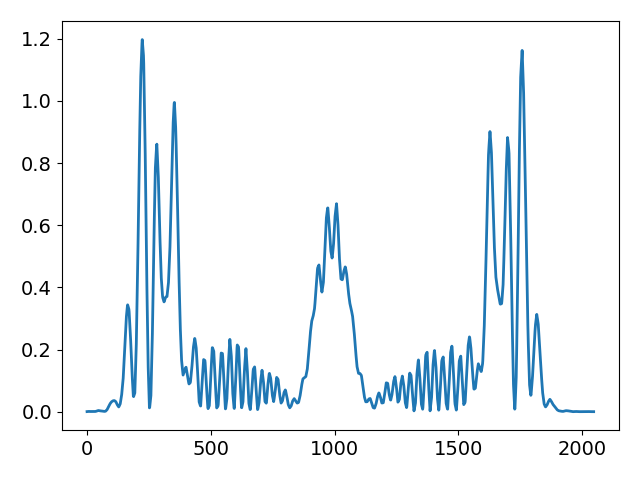

In [90]:
plt.figure()
plt.plot(ds_IP.profile[1024,:])

In [16]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=10, time_window=100)

In [17]:
pulse_test.energy

array([9499.53501723, 9499.57930131, 9499.62358538, 9499.66786945,
       9499.71215353, 9499.7564376 , 9499.80072167, 9499.84500574,
       9499.88928982, 9499.93357389, 9499.97785796, 9500.02214204,
       9500.06642611, 9500.11071018, 9500.15499426, 9500.19927833,
       9500.2435624 , 9500.28784647, 9500.33213055, 9500.37641462,
       9500.42069869, 9500.46498277])

In [18]:
.41*2000

820.0